In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv',header=0,delimiter=',', encoding='utf-8')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Dùng Heapmap để trực quan dữ liệu bị thiếu. Cho biết dữ liệu nào đang bị thiếu.

<Axes: >

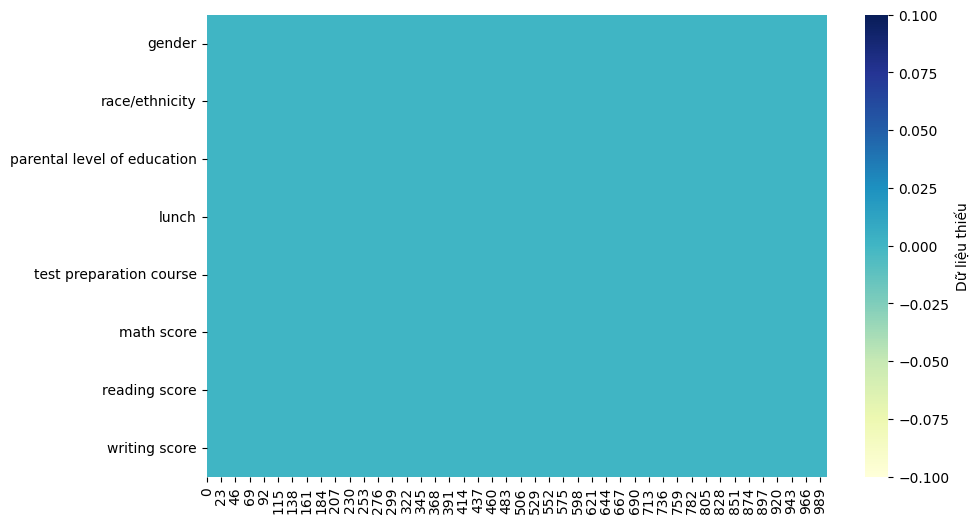

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',cbar_kws={'label':'Dữ liệu thiếu'})
# nhận xét:
# không có cột nào bị thiếu dữ liệu

CÁC BÀI TOÁN VỀ KIỂM ĐỊNH

In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.	Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp Z-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

In [6]:
print(df['math score'].loc[df['race/ethnicity'] == 'group C'].mean())


64.46394984326018


In [4]:
# kiểm tra xem biến giá trị trung bình của math score theo nhóm race/ethnicity là group C có bằng 65 với mức sai lầm 5% hay không
from statsmodels.stats.weightstats import ztest as ztest
dftest = df.loc[df['race/ethnicity'] == 'group C']
ztest(dftest['math score'],value=65.0)

# Kết luận:
# do alpha = 0.05 < p-value = 0.5191806081324302 nên ta chấp nhận giả thuyết với mức sai lầm 5%

(-0.6446089890649522, 0.5191806081324302)

2.	Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp T-Test với mức sai lầm là 10%. Cho nhận xét

In [5]:
# kiểm tra xem trung bình của highway MPG và trung bình của writing score có bằng nhau hay không
import scipy.stats as stats
dftest1 = df.head(16)
stats.ttest_ind(dftest1['reading score'], dftest1['writing score'], equal_var=True)
# Kết luận:
# do p-value = 0.6047359429520369 > alpha = 0.1 nên ta chấp nhận giả thuyết với mức sai lầm 10%

TtestResult(statistic=0.5231163537101077, pvalue=0.6047359429520369, df=30.0)

3.	Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Chi-Square với mức sai lầm là 5%? Cho nhận xét.

In [6]:
from scipy.stats import chi2_contingency

In [10]:
from scipy.stats.stats import pearsonr

C:\Users\Admin\AppData\Local\Temp\ipykernel_3640\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [11]:
pearsonr(df['reading score'],df['writing score'])

PearsonRResult(statistic=0.9545980771462479, pvalue=0.0)

In [8]:
# kiểm tra có sự phụ thuộc nào giữa reading score và writing score hay không?
crosdata = pd.crosstab(df['reading score'],[df['writing score']],rownames=['reading score'],colnames=['writing score'])
crosdata

writing score,10,15,19,22,23,27,28,30,32,33,...,91,92,93,94,95,96,97,98,99,100
reading score,,,,,,,,,,,,,,,,,,,,,
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,2,1,2,0,0,0,0,0,1
96,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,3,0,0,1,0


<Axes: >

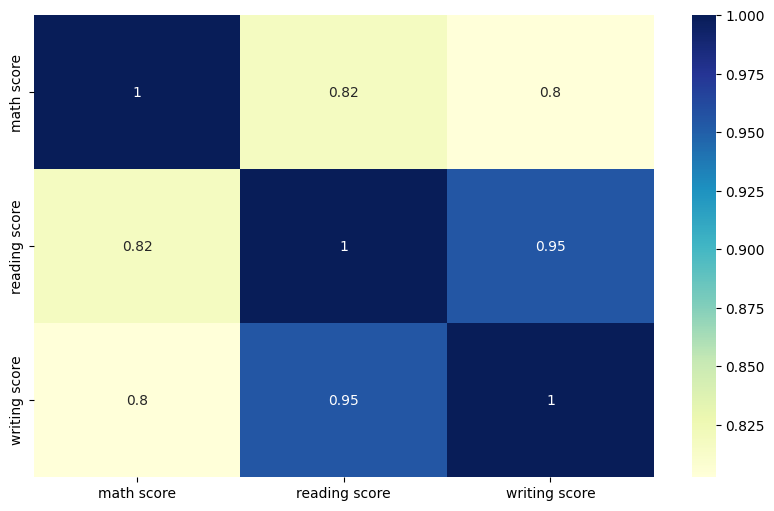

In [12]:
dfheatmap = df.select_dtypes(exclude=['object'])
plt.figure(figsize=(10,6))
sns.heatmap(dfheatmap.corr(), annot=True, cmap='YlGnBu')



In [9]:
stat, p, dof, excepted = chi2_contingency(crosdata)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (Reject H0)')
else:
    print ('Independent (H0 holds true)')
# Kết luận: p-value = 0.0 < alpha = 0.05
# Tức là: có sự quan hệ giữa reading score và writing score

p value is 0.0
Dependent (Reject H0)


4.	Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp T-Test của 1 một thuộc tính nào đó với mức sai lầm là 5%. Cho nhận xét

In [15]:
from scipy.stats import ttest_1samp

# kiểm tra trung bình của math score theo nhóm race/ethnicity là group A có bằng 54 hay không
dftest1 = df.loc[df['race/ethnicity'] == 'group A'].head(30)
ttest_1samp(dftest1['math score'], popmean=54)
# Kết luận:
# do p-value = 0.18282501214052385 < alpha = 0.05 nên ta bác bỏ giả thuyết
# => không đủ dữ liệu để nói rằng trung bình của math score theo nhóm race/ethnicity là group A bằng 54

TtestResult(statistic=1.364759533789466, pvalue=0.18282501214052385, df=29)

5.	Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp Z-Test với mức sai lầm là 10%. Cho nhận xét

In [16]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# Kiểm tra trung bình reading score và writing score có bằng nhau hay không
ztest(df['reading score'],df['writing score'], value=0)
# KẾt luận
# do p-value = 0.09428828255455124 < alpha = 0.1 nên ta bác bỏ giả thuyết với mức sai lầm 10%
# => không đủ dữ liệu để nói rằng trung bình reading score và writing score bằng nhau

(1.6731982103781682, 0.09428828255455124)

6.	Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Fisher với mức sai lầm là 5%? Cho nhận xét.

In [18]:
import scipy.stats as stats

In [19]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
# Kiểm tra có sự phụ thuộc nào giữa gender và test preparation course
crosdata = pd.crosstab(df['gender'],[df['test preparation course']],rownames=['gender'],colnames=['test preparation course'])
crosdata

test preparation course,completed,none
gender,,
female,184,334
male,174,308


In [21]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is: ' + str(odd_ratio))
print('p_value is: ' + str(p_value))
# Kết luận:
# do p-value = 0.8949914298347688 > alpha = 0.05 nên ta bác bỏ giả thuyết
# => không đủ dữ liệu để nói rằng giữa gender và test preparation course là không có mối quan hệ gì cả ở mức sai lầm 5%

odd ratio is: 0.9751531419918783
p_value is: 0.8949914298347688


7.	Kiểm định ANOVA cho trường hợp biến định lượng trên nhóm định tính

In [22]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.rename(columns={'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'}, inplace=True)

In [24]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

model = ols('math_score ~ gender', data=df).fit()
aov_table = sm.stats.anova_lm(model,typ = 1)
aov_table


#  p-value = 9.120186e-08 < 0.05 => không chấp thuận
#     => có sự phụ thuộc


,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,6481.373854,6481.373854,28.979336,9.120186e-08
Residual,998.0,223207.705146,223.655015,NaN,NaN


8.	Kiểm định ANOVA các biến định lượng trên từng nhóm theo phân phối chuẩn

In [26]:


model = ols('math_score ~ gender + lunch + gender:lunch', data=df).fit()
result = sm.stats.anova_lm(model,type = 2)
print(result)
# Kết luận:


                 df         sum_sq       mean_sq           F        PR(>F)
gender          1.0    6481.373854   6481.373854   33.094263  1.167621e-08
lunch           1.0   27714.992744  27714.992744  141.514328  1.314908e-30
gender:lunch    1.0     430.253550    430.253550    2.196899  1.386050e-01
Residual      996.0  195062.458852    195.845842         NaN           NaN


In [ ]:
'''
nhận xét: có sự khác nhau
p-value = 1.167621e-08 -> math_score phụ thuộc theo nhóm gender
p-value = 1.314908e-30 -> math_score phụ thuộc theo nhóm lunch
p-value = 1.386050e-01 -> math_score phụ thuộc theo nhóm gender trên từng lunch
'''

2)	HỒI QUY TUYẾN TÍNH, PHÂN LỚP, PCA

Thực hiện hồi quy tuyến tính từ Scikit-learn (dùng hàm LinearRegression()) cho trường hợp 1 biến và 2 biến.

1 Biến

In [27]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the data
df = pd.read_csv('StudentsPerformance.csv',header=0,delimiter=',', encoding='utf-8')

# Split the data into training and testing sets
X = df[['writing score']]
y = df['reading score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Evaluate the model by calculating the mean squared error and R-squared
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % r2_score(y_test, y_pred))


# mô hình có R-squared là 92% có nghĩa là 92% biến thể trong biến phản hồi có thể được giải thích bằng các biến trong mô hình
# Mean squared error cho thấy sự khác biệt giữa giá trị dự đoán và giá trị thực tế

Mean squared error: 15.85
R-squared: 0.92


2 Biến

In [29]:

# Split the data into training and testing sets
X = df[['reading score', 'writing score']]
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Evaluate the model by calculating the mean squared error and R-squared
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % r2_score(y_test, y_pred))

# mô hình có R-squared là 61% có nghĩa là 61% biến thể trong biến phản hồi có thể được giải thích bằng các biến trong mô hình
# Mean squared error cho thấy sự khác biệt giữa giá trị dự đoán và giá trị thực tế

Mean squared error: 79.51
R-squared: 0.61


2.	Thực hiện hồi quy tuyến tính bằng phương pháp StaSmodels (Dùng hàm OLS()) cho trường hợp 1 biến và 2 biến.

In [30]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1 Biến

In [31]:
import pandas as pd
import statsmodels.api as sm

X_with_constant = sm.add_constant(df[["reading score"]].values)
y = df[['writing score']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())

'''
Adj. R-squared = 91.1%: đủ để giải thích cho điểm writing score, nói cách khác có thể dựa 
reading score để giải thích được
Prob (F-statistic) = 0.00 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê
writing score = -0.6676 +  0.9935 * writing score 
P>|t| = 0.000 < 0.05: reading score có ý nghĩa thống kê
Giả sử reading score = 70
=> writing score = 68.8774
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:40:03   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6676      0.694     -0.962      0.3

'\nAdj. R-squared = 91.1%: đủ để giải thích cho điểm writing score, nói cách khác có thể dựa \nreading score để giải thích được\nProb (F-statistic) = 0.00 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê\nwriting score = -0.6676 +  0.9935 * writing score \nP>|t| = 0.000 < 0.05: T6 có ý nghĩa thống kê\nGiả sử reading score = 70\n=> writing score = 68.8774\n'

2 Biến

In [32]:
import pandas as pd
import statsmodels.api as sm

X_with_constant = sm.add_constant(df[["reading score","writing score"]].values)
y = df[['math score']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())

'''
Adj. R-squared = 67.3%: đủ để giải thích cho điểm math score, nói cách khác có thể dựa 
reading score và writing score để giải thích được
Prob (F-statistic) = 2.25e-243 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê
x1 = |0.6013| tác động mạnh hơn so với writing score (x2 = |0.2494|)
do x1 dương nên tác động tích cực (đồng biến)
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.25e-243
Time:                        21:40:07   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5241      1.328      5.665      0.0

'\nAdj. R-squared = 67.3%: đủ để giải thích cho điểm math score, nói cách khác có thể dựa \nreading score và writing score để giải thích được\nProb (F-statistic) = 2.25e-243 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê\nx1 = |0.6013| tác động mạnh hơn so với writing score (x2 = |0.2494|)\ndo x1 dương nên tác động tích cực (đồng biến)\n'

3.	Phân Lớp, Gom Cụm (Clustering)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
# tạo DataFrame mới với các biến nhị phân mới
EC = pd.get_dummies(df['test preparation course'], drop_first=True)
# xóa cột test preparation course
df.drop(['test preparation course'], axis=1, inplace=True)
# nối DataFrame mới với DataFrame cũ, axis = 1 là nối theo cột
df = pd.concat([df, EC], axis=1)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,none
0,female,group B,bachelor's degree,standard,72,72,74,True
1,female,group C,some college,standard,69,90,88,False
2,female,group B,master's degree,standard,90,95,93,True
3,male,group A,associate's degree,free/reduced,47,57,44,True
4,male,group C,some college,standard,76,78,75,True


In [36]:
X = df[['math score','reading score','writing score']].values
y = df[['none']].values
from sklearn.model_selection import train_test_split
# chia tách dữ liệu thành hai tập: tập huấn (train set) và tập kiểm tra (test set).
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [37]:
from sklearn.linear_model import LogisticRegression
# tạo mô hình
classifier = LogisticRegression()
# huấn luyện mô hình
classifier.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
# Trọng số là các tham số của mô hình được học trong quá trình huấn luyện.
# Trọng số được sử dụng để kết hợp các biến độc lập để dự đoán biến phụ thuộc.
classifier.coef_

# A1 (math score) = 0.02809265
# A2 (reading score) = 0.07499254
# A3 (writing score) = -0.13902725

array([[ 0.02809265,  0.07499254, -0.13902725]])

In [39]:
# tham số bias
# để điều chỉnh đường dự đoán của mô hình phù hợp hơn với dữ liệu thực tế.
classifier.intercept_
# A0 = 3.05597962

array([3.05597962])

In [40]:
# phương trình phân lớp
# với math score = 72, reading score = 90, writing score = 78
Z = classifier.intercept_ + classifier.coef_[0][0]*72 + classifier.coef_[0][1]*90
+ classifier.coef_[0][2]*78
print(Z)

[11.82797895]


In [41]:
# tính xác suất dự đoán của mô hình
p = 1/(1+np.exp(-Z))
print(p)

if p > 0.5:
    print('Yes')
else:
    print('No')

[0.9999927]
Yes


In [42]:
y_pred = classifier.predict(x_test)
y_pred
#  mảng chứa các nhãn dự đoán của mô hình
#  đại diện cho xác suất dự đoán của mô hình

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True,

In [43]:
classifier.predict_proba(x_test)[:,1]

array([0.82026794, 0.66533234, 0.591075  , 0.73652767, 0.70729478,
       0.81959699, 0.72137526, 0.85917959, 0.63585232, 0.56432063,
       0.83233196, 0.70119384, 0.79427465, 0.65723804, 0.74150185,
       0.39151114, 0.43683072, 0.46553409, 0.57781705, 0.71974716,
       0.42654613, 0.43471227, 0.65017511, 0.86908471, 0.86407211,
       0.67673111, 0.61876821, 0.51239593, 0.5786328 , 0.45361742,
       0.71849144, 0.64621383, 0.89947316, 0.47967433, 0.59335523,
       0.7919019 , 0.57666982, 0.69487865, 0.82568443, 0.35533934,
       0.69313672, 0.49051384, 0.49836212, 0.55668315, 0.25619323,
       0.4458088 , 0.69392274, 0.66950696, 0.91828229, 0.43654544,
       0.43231584, 0.71199301, 0.64370464, 0.60413572, 0.33838787,
       0.85329847, 0.34863996, 0.64697816, 0.62451452, 0.31393756,
       0.90645663, 0.79934493, 0.8888427 , 0.72510042, 0.77586708,
       0.51441594, 0.70946896, 0.46181573, 0.60134682, 0.88781815,
       0.67848879, 0.78905743, 0.49712776, 0.78408707, 0.87226

In [44]:
print('Prediction with threshold = 0.9: ')
# ngưỡng mặc định là o.5
Y_pred_new_threshhold = (classifier.predict_proba(x_test)[:,1] >= 0.9).astype(int)
print(Y_pred_new_threshhold)
# trả về một mảng tại các vị trí có xác suất dự đoán >= 0.9
# 

Prediction with threshold = 0.9: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0]


In [45]:
result = pd.DataFrame({'Actual': y_test.flatten().astype(int), 'Predicted': y_pred.flatten().astype(int),
                      'Predicted': y_pred.astype(int)})
result.head(10)
# đánh giá hiệu suất của mô hình Logistic Regression bằng cách so sánh các nhãn dự đoán với nhãn thực tế

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,1


In [46]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix
# Ma trận nhầm lẫn là một bảng vuông cho thấy số lượng mẫu được dự đoán đúng và sai cho từng lớp.

array([[ 51,  54],
       [ 37, 158]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

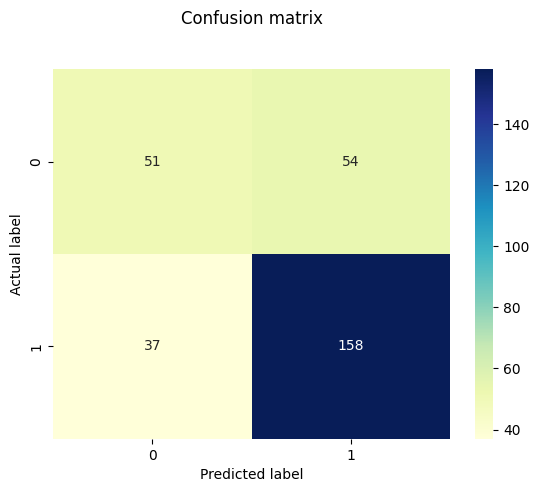

In [47]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Độ chính xác của mô hình

0.6966666666666667

In [49]:
target_names = ['Not oriented', 'Oriented']
print(classification_report(y_test, y_pred, target_names=target_names))
# Báo cáo phân loại
# Precision: Tỷ lệ phần trăm các dự đoán dương tính là chính xác.
# Recall: Tỷ lệ phần trăm các mẫu dương tính thực sự được dự đoán chính xác.
# F1-score: Điểm F1 là trung bình điều hoà của độ chính xác và độ thu hồi.
# Support: Số lượng mẫu trong mỗi lớp

              precision    recall  f1-score   support

Not oriented       0.58      0.49      0.53       105
    Oriented       0.75      0.81      0.78       195

    accuracy                           0.70       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.69      0.70      0.69       300



Gom cụm

In [50]:
df.head(5) 

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,none
0,female,group B,bachelor's degree,standard,72,72,74,True
1,female,group C,some college,standard,69,90,88,False
2,female,group B,master's degree,standard,90,95,93,True
3,male,group A,associate's degree,free/reduced,47,57,44,True
4,male,group C,some college,standard,76,78,75,True


In [51]:
data = df[['reading score','writing score']]
data.head(5)

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [52]:
# độ đo euclid
d = np.sqrt((72-90)**2+(74-88)**2)
d

22.80350850198276

In [53]:
# khởi tạo một dối tượng có số lượng cụm là 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(data)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
print(kmeans.cluster_centers_) #số tâm
print(kmeans.inertia_) #Độ đo đánh giá
print(kmeans.n_iter_) #Sẽ lặp bao nhiều lần để tìm giá trị điển hình 
print(kmeans.labels_[:]) 


[[88.80102041 88.39795918]
 [45.35766423 43.01459854]
 [60.93485342 59.67752443]
 [74.56388889 73.65      ]]
59289.84677759254
12
[3 0 0 1 3 3 0 1 2 2 2 1 3 3 2 3 0 1 1 2 2 3 2 3 3 3 2 3 3 3 3 2 3 1 0 3 0
 2 0 2 2 3 2 2 2 2 2 3 3 0 1 3 1 3 0 1 0 1 2 1 3 1 2 3 2 2 1 3 2 2 3 2 1 2
 1 1 1 3 3 3 1 1 1 2 1 3 0 3 3 0 3 1 3 1 0 0 2 3 2 2 2 3 0 1 0 3 0 2 3 3 0
 1 1 2 0 3 0 3 2 2 0 0 0 2 3 0 3 3 3 1 0 1 3 0 3 1 1 2 2 2 3 2 2 1 3 1 3 2
 3 0 3 3 3 1 2 0 3 2 0 2 3 0 2 1 0 0 1 3 3 3 3 0 0 3 2 0 2 3 2 0 3 2 1 3 1
 2 3 2 1 0 2 3 2 2 0 2 2 2 2 3 0 3 3 3 1 3 2 3 3 2 3 1 2 2 0 3 0 1 3 2 3 3
 2 3 3 2 3 1 3 0 2 1 0 0 0 3 2 2 1 3 2 0 2 1 3 3 3 3 2 2 1 0 3 3 1 3 3 3 3
 3 3 3 1 0 3 1 3 3 0 3 2 1 2 3 3 3 0 3 0 2 1 1 0 3 1 0 0 0 3 3 3 3 2 3 3 2
 1 3 1 3 3 2 0 3 3 3 0 1 3 2 3 2 2 3 3 2 0 3 3 2 0 0 3 2 1 0 2 1 3 2 2 1 2
 3 0 2 3 1 1 2 2 3 3 3 3 3 2 0 3 3 2 2 3 2 3 3 2 3 2 0 2 3 2 1 2 2 2 2 2 0
 3 3 3 0 3 1 0 0 3 2 0 0 3 1 1 3 3 3 2 3 2 3 2 2 3 1 2 0 2 2 2 1 2 0 2 3 2
 3 2 0 3 3 2 2 3 3 3 3 2 2 0 2 2 0 1 2 0 3 2 

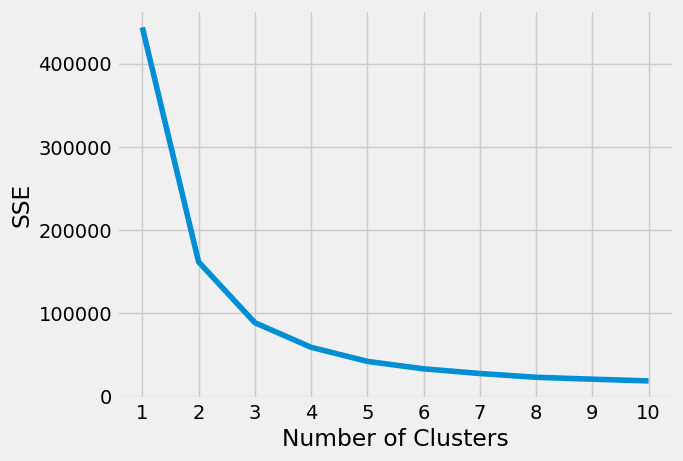

In [55]:
kmean_kwargs = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':42}
#   `init='random'` nghĩa là các tâm cụm ban đầu được chọn ngẫu nhiên, `n_init=10` nghĩa là thuật toán sẽ chạy 10 lần với các tâm cụm khởi tạo khác nhau.
#  `max_iter=300` là số lượng lần lặp tối đa cho mỗi lần chạy.
#  `random_state=42` đảm bảo kết quả có thể tái tạo được.

sse = []
#   sse = []: Khởi tạo danh sách để lưu trữ giá trị SSE (sum of squared errors) cho mỗi số lượng cụm.

for i in range(1,11): #   Vòng lặp `for i in range(1,11)` chạy thuật toán K-Means với số lượng cụm từ 1 đến 10.
    kmeans = KMeans(n_clusters=i, **kmean_kwargs)#   kmeans = KMeans(n_clusters=i, **kmean_kwargs)`: Khởi tạo một đối tượng KMeans với số lượng cụm là `i` và các tham số khác.
    kmeans.fit(data) #   kmeans.fit(data)`: Huấn luyện mô hình KMeans trên dữ liệu.
    sse.append(kmeans.inertia_) # Thêm giá trị SSE của mô hình vào danh sách `sse`. `kmeans.inertia_` trả về tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm cụm gần nhất.
   
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
#  Vẽ đồ thị giữa số lượng cụm (từ 1 đến 10) và giá trị SSE tương ứng.
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

4. PCA

In [ ]:
'''
PCA
1. Principal component analysis là gì?
Phương pháp dựa trên phương pháp tuyến tính
2. Mục đích của PCA
- Khám phá được tương quan tuyến tính của đa biến
- Giảm thiểu số lượng các cột dữ liệu (biến số) nhằm giúp chỉ quan tâm đến các cột có tác 
động mạnh với nhau.
-> Giảm thiểu số chiều dữ liệu. Hay nói cách khác thay vì phải phân tích trên toàn bộ các 
cột dữ liệu thì ta sẽ
giảm thiểu nhằm phân tích trên các cột trong tâm.
3. PCA thuộc nhóm học máy nào?
Un-supervised
4. Ý nghĩa biểu diễn tập dữ liệu bằng các components (PC)
5. Hiểu được đại lượng proportion of variance: Biểu diễn % sự đa dạng của tập dữ liệu 
còn giữ được sau khi dùng các component để biểu diễn
6. Các xác đinh bao nhiêu component để biểu diễn dữ liệu là tốt nhất: Dùng Scree Chart 
(Elbow test)
7. Đọc và hiểu thông tin dữ liệu trên từng component: Kiểm tra xem mỗi component đang 
đại diện cho những cột dữ liệu nào trong tập dữ liệu ban đầu
'''

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data


In [57]:
dfdata = get_data('gexp').data
dfdata.head(5)

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [58]:
dfdata_st = StandardScaler().fit_transform(dfdata)
pd.DataFrame(dfdata_st, columns=dfdata.columns).head(5)

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617


In [59]:
pca_out = PCA().fit(dfdata_st)
pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [60]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [61]:
from sklearn.datasets import load_breast_cancer

cancer_set = load_breast_cancer()

cancer_data = pd.DataFrame(cancer_set.data, columns=cancer_set.feature_names)
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cancer_data)

scale_cancer_data = scaler.transform(cancer_data)
scale_cancer_data 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [64]:
from sklearn.decomposition import PCA

# khởi tạo một đối tượng PCA với số component là 2
my_pca = PCA(n_components=2)
# fit vào data
my_pca.fit(scale_cancer_data)
# thực hiện transform
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)

print("Dữ liệu gốc: ", scale_cancer_data.shape)
# Dữ liệu gốc:  (569, 30)

print("Dữ liệu sau khi PCA: ", pca_scale_cancer_data.shape)
# Dữ liệu sau khi PCA:  (569, 2)

Dữ liệu gốc:  (569, 30)
Dữ liệu sau khi PCA:  (569, 2)


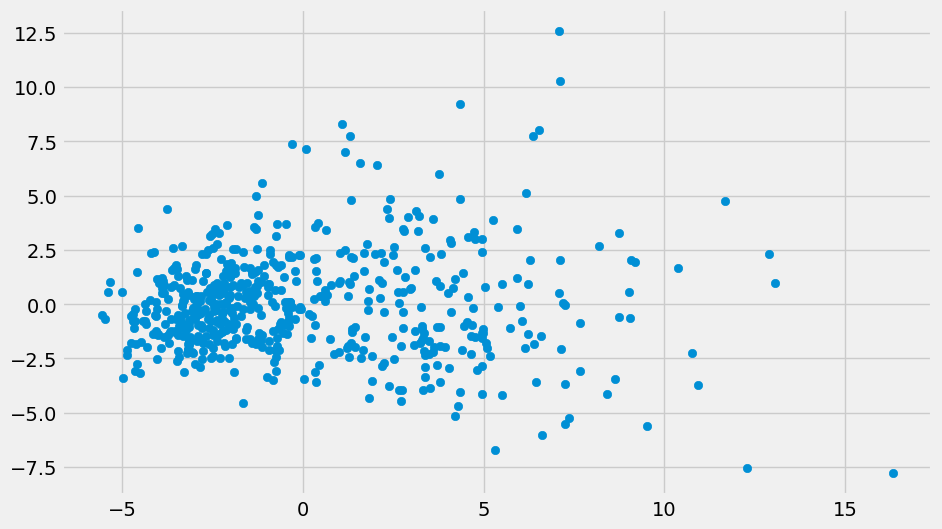

In [65]:
plt.figure(figsize=(10,6))

# thành phần comp số 1
pca_1 = pca_scale_cancer_data[:,0]
# thành phần comp số 2
pca_2 = pca_scale_cancer_data[:,1]
# vẽ đồ thị
plt.scatter(pca_1, pca_2)
# Nhận xét:
# biểu đồ tập trung ở gần gốc tọa độ và phân tán dần về cuối trục hoành

In [66]:
cancer_set['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

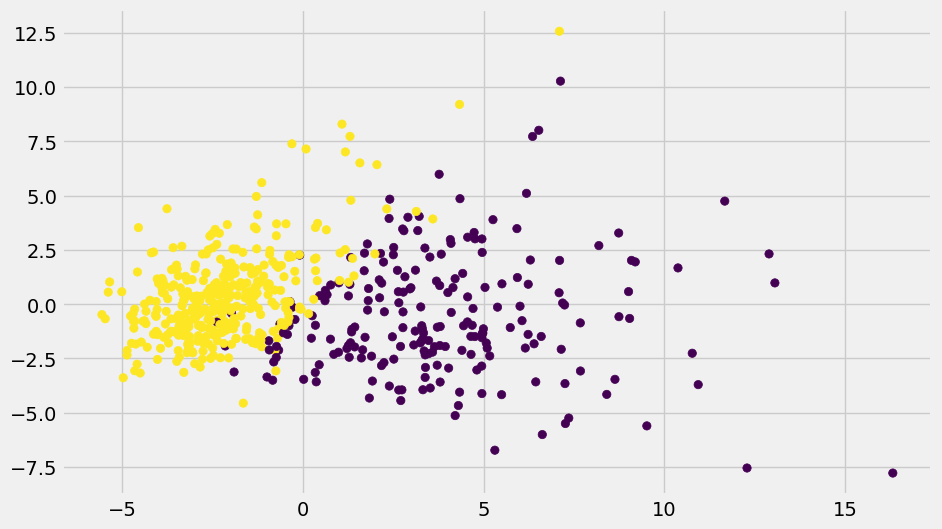

In [67]:
plt.figure(figsize=(10,6))

pca_1 = pca_scale_cancer_data[:,0]

pca_2 = pca_scale_cancer_data[:,1]

plt.scatter(x = pca_1, y = pca_2, c = cancer_set['target'])


In [68]:
my_pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [69]:
pca_comp = pd.DataFrame(data = my_pca.components_, columns=cancer_data.columns)
pca_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
